In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("fraudTest.csv")
df_train = pd.read_csv("fraudTrain.csv")

In [8]:
df_test.drop("Unnamed: 0", axis=1, inplace=True)
df_train.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
df_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771134,2019-11-25 21:13:05,565399283797,"fraud_Cole, Hills and Jewess",home,88.74,Anthony,Allen,M,6993 Carr Lodge Apt. 311,Jordan Valley,...,42.8801,-117.2810,641.0,Economist,1993-11-24,87e4ffed650bdf0fd072ba0f1ff75c33,1.353878e+09,41.906717,-116.513663,0.0
771135,2019-11-25 21:13:33,378278619832195,fraud_Powlowski-Weimann,food_dining,16.85,Mary,Mcintyre,F,77921 Costa Villages,Eugene,...,44.0385,-123.0614,191096.0,"Scientist, physiological",1964-04-06,d39844e179ac2c2e9d7d7f7333d7f256,1.353878e+09,44.272642,-122.545885,0.0
771136,2019-11-25 21:13:52,30561214688470,fraud_Jaskolski-Vandervort,misc_net,208.53,Gina,Morrison,F,41851 Victor Drives Suite 219,Allentown,...,40.5891,-75.4645,166081.0,"Scientist, research (maths)",1998-10-01,248a29b7265a5e2f205391805e68867a,1.353878e+09,40.592505,-75.426997,0.0
771137,2019-11-25 21:13:59,3518234918950662,fraud_Barton LLC,kids_pets,73.56,Barbara,Lowe,F,67210 Lori Creek,Sherman,...,33.6372,-96.6184,46563.0,Systems developer,1970-09-11,6f52d5c70401852ca83327819e76dfa9,1.353878e+09,33.046258,-97.284665,0.0


In [12]:
df_test.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [13]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7.711390e+05,771139.000000,771139.000000,771139.000000,771138.000000,7.711380e+05,7.711380e+05,771138.000000,771138.000000,771138.000000
mean,4.165253e+17,70.211695,48774.698357,38.537069,-90.214916,8.912657e+04,1.340348e+09,38.536904,-90.215254,0.005856
std,1.308004e+18,158.002222,26905.278571,5.073598,13.763927,3.029433e+05,7.768591e+06,5.107800,13.775718,0.076302
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,1.800365e+14,9.650000,26237.000000,34.668900,-96.798000,7.430000e+02,1.333960e+09,34.739795,-96.888514,0.000000
50%,3.520550e+15,47.400000,48174.000000,39.354300,-87.461600,2.456000e+03,1.340650e+09,39.367722,-87.425657,0.000000
75%,4.642255e+15,83.050000,72011.000000,41.894800,-80.158000,2.047800e+04,1.346553e+09,41.954215,-80.217554,0.000000
max,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.353878e+09,67.510267,-66.956540,1.000000


In [14]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Fraud in Test Dataframe')

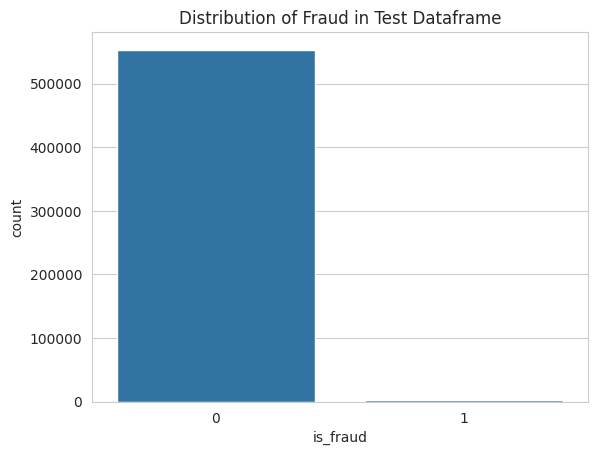

In [15]:
sns.countplot(x="is_fraud", data=df_test)
plt.title("Distribution of Fraud in Test Dataframe")

Text(0.5, 1.0, 'Distribution of Fraud in Train Dataframe')

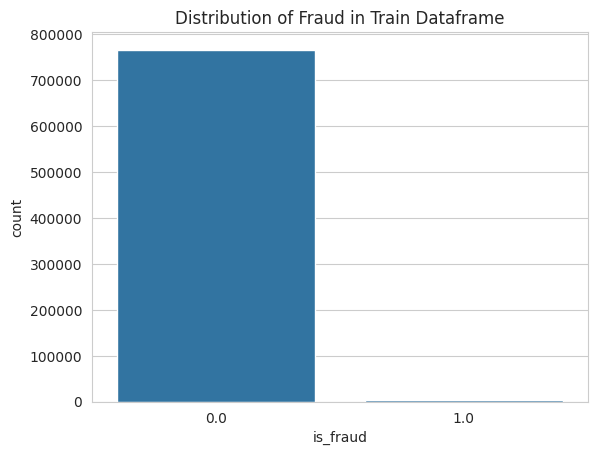

In [16]:
sns.countplot(x="is_fraud", data=df_train)
plt.title("Distribution of Fraud in Train Dataframe")